# Multi-scale SR in Tesser

Here is a notebook for playing around and comparing adjacency vs. transition matrices.
Function get_adj_tesser is based on the snippet in Athula's notebook.
Note that unlike state-action-state RL, here the agent doesn't take actions and is passively learning. Therefore, learning is more similar to Momennejad et al. 2017, Experiment 1, where the agent learns by viewing the world. 

In [75]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import os, sys
print(sys.version)
sys.path.append('../')
import networkx as nx
import graphviz
import pygraphviz
#!pip install python-louvain
import community



3.7.1 (v3.7.1:260ec2c36a, Oct 20 2018, 03:13:28) 
[Clang 6.0 (clang-600.0.57)]


# Get Adjacency Matrix & plot it

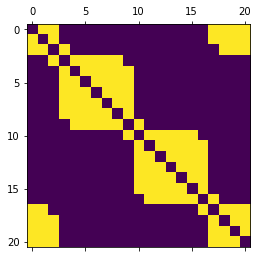

In [3]:
import get_adj_tesser as ga
A=ga.get_a() 
plt.matshow(A)
plt.show()

6


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


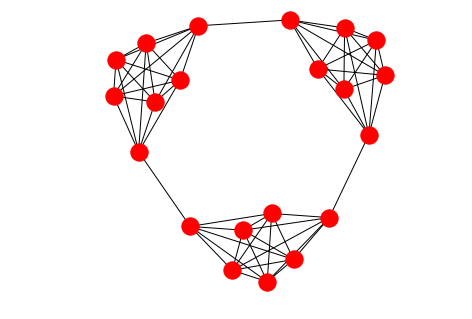

In [168]:
G=nx.from_numpy_matrix(A)
print(G.degree(2))
#nx.draw(G, pos=nx.spring_layout(G))
nx.draw(G, nx.nx_pydot.graphviz_layout(G))
plt.axis('equal')
plt.show()

# Bridge nodes and communicability centrality

Now if we wanted to detect only the bridges, we can use communicability betweenness centrality. In the graph below, the bridge ties in the graph are in different colors.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(13.580448427218451, 308.36955157278146, 5.044922640827677, 289.3950773591723)

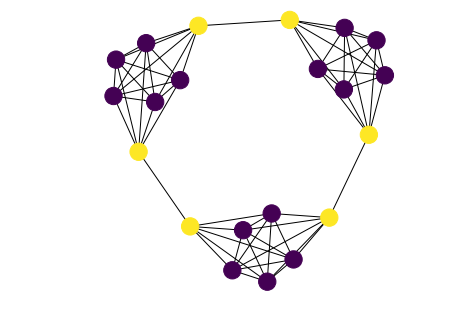

In [169]:
length=nx.communicability_betweenness_centrality(G)
nodelist,hops = zip(*length.items())
p=nx.nx_pydot.graphviz_layout(G, prog='neato', root=0)
nx.draw(G, p, nodelist = nodelist, node_color=hops)
plt.axis('equal')

# Community detection
If we use partition values to color the graph, we get a different color for each cluster. Therefore, partition can be used to detect communities.

(13.580448427218451, 308.36955157278146, 5.044922640827677, 289.3950773591723)

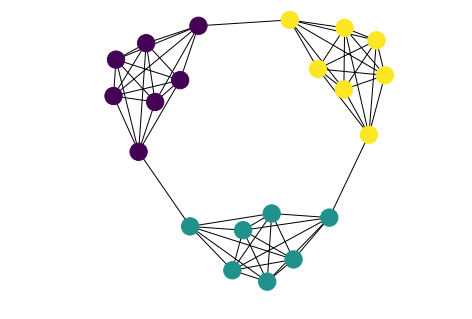

In [170]:
# compute communities so we can color nodes accordingly
partition = community.best_partition(G)  
nx.draw(G, p, nodelist = nodelist, node_color=list(partition.values()))
plt.axis('equal')

In [79]:
nx.shortest_path_length(G, 0)
comex=nx.communicability_exp(G)
type(comex)

dict

# Communicability distance

I've mentioned that communicability is very similar to SR, and in fact that's what Mona garvert uses it. Here's how to compute it. Comg below is a dict type, so I turn it into a mat.

Note: If you scroll down a bit, you'll notice that this looks very much like the SR computed from T below. 


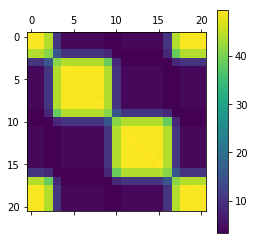

In [149]:
comg=nx.communicability(G)
mat=np.identity(21)

for i in nodelist:
    aa=comg[i]
    #print(aa)
    mat[i,:] = np.array([aa[j] for j in nodelist])
    
type(mat)

plt.matshow(mat)
plt.colorbar()

# Communicability distance vs. SR(T, .999)

For comparison to communicability distance, I've included SR computed from T below. You can notice that the stuctures are similar.


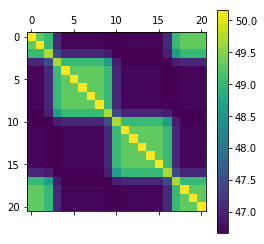

In [165]:
I=np.identity(21)
T=A/6
sr_T = inv(I - (.999 * T))
plt.matshow(sr_T)
plt.colorbar()

# Transition Matrix & its multi-scale SRs
Let's plot the transition and adjacency matrices side by side.
They're not very different here.

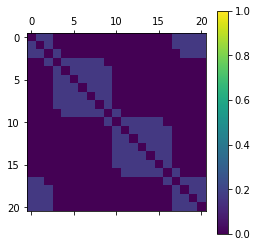

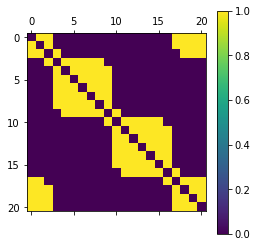

In [5]:
T=A/6
plt.matshow(T, vmin=0, vmax=1)
plt.colorbar()
plt.matshow(A, vmin=0, vmax=1)
plt.colorbar()

Now let us plot the SRs generated with the transition matrix.

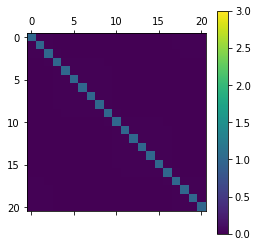

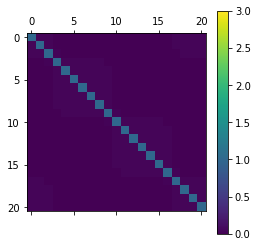

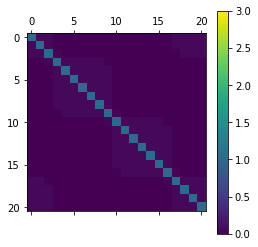

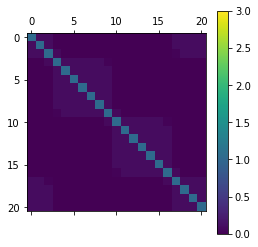

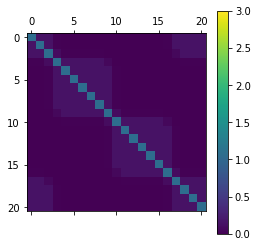

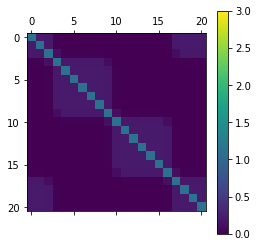

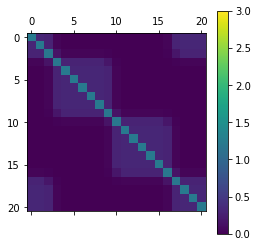

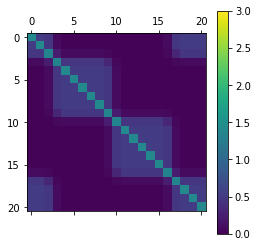

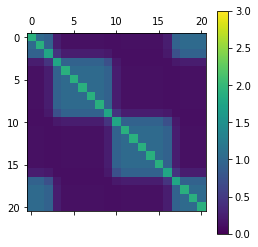

In [6]:
gamma_range=np.arange(1,10)/10

for g in gamma_range:
    sr_T = inv(I - (g * T))
    plt.matshow(sr_T, vmin=0, vmax=3)
    plt.colorbar()